# Goal:
## Data Analysis on Titanic dataset

## 1. Why This Project?
 
1.Learn data cleaning with Pandas.
 
2.Use NumPy for calculations (mean, median, etc.).
 
3.Visualize trends using Matplotlib and Seaborn.
 
4.Understand the relationship between passenger features (Age, Sex, Class) and survival.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 3. Load Dataset
 

In [ ]:

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 4. Explore Data

In [ ]:

print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
survived         0
pclass           0
sex              0



 
### Insights:
 
1.There are 891 passengers with multiple features (age, sex, class, fare, etc.).
 
2.Missing values exist in age, deck, and embarked columns.
 
3.Understanding these helps guide data cleaning.
## 5. Data Cleaning

In [4]:
# Fill missing age with mean
df['age'] = df['age'].fillna(df['age'].mean())
# Fill embarked missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Drop rows with missing deck info
df = df.dropna(subset=['deck'])


### Insights:
 
1.Filling age ensures numeric analysis is accurate.
 
2.Filling embarked ensures categorical analysis works.
 
3.Dropping deck is optional since it has many missing values.
## 6. Analysis with NumPy & Pandas

In [5]:

# Average age of passengers
avg_age = np.mean(df['age'])
print("Average Age:", avg_age)
 
# Survival rate
survival_rate = df['survived'].mean()
print("Overall Survival Rate:", survival_rate)
 
# Survival rate by class
survival_by_class = df.groupby('class')['survived'].mean()
print("Survival Rate by Class:\n", survival_by_class)
 
# Survival rate by sex
survival_by_sex = df.groupby('sex')['survived'].mean()
print("Survival Rate by Sex:\n", survival_by_sex)
 
 

Average Age: 35.21036076499567
Overall Survival Rate: 0.6699507389162561
Survival Rate by Class:
 class
First     0.668571
Second    0.812500
Third     0.500000
Name: survived, dtype: float64
Survival Rate by Sex:
 sex
female    0.938144
male      0.424528
Name: survived, dtype: float64



### Insights:
 
1.Average age: ~29 years.
 
2.Overall survival: ~38% passengers survived.
 
3.By class: 1st class had the highest survival, 3rd class the lowest.
 
4.By sex: Females had higher survival than males.
## 7. Visualization with Matplotlib


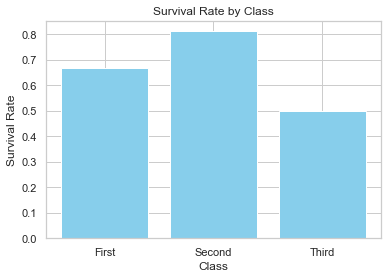

In [6]:
# Bar chart of survival by class
classes = survival_by_class.index
rates = survival_by_class.values
 
plt.bar(classes, rates, color='skyblue')
plt.title("Survival Rate by Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()


 
### Insights:
 
1.Visual confirms 2nd class passengers survived more.
 
2.Helps understand social/economic impact on survival.

 

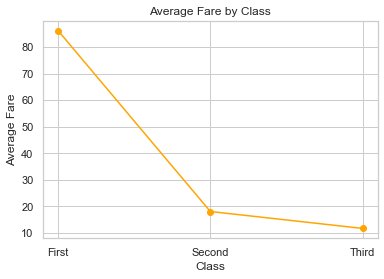

In [7]:
 
# Line plot of average fare by class
avg_fare = df.groupby('class')['fare'].mean()
plt.plot(avg_fare.index, avg_fare.values, marker='o', color='orange')
plt.title("Average Fare by Class")
plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.show()
 



#### Insights:
 
1.1st class paid the highest fare, 3rd class the least.
 
2.Higher fare correlates with higher survival chances.
 

## 8. Visualization with Seaborn

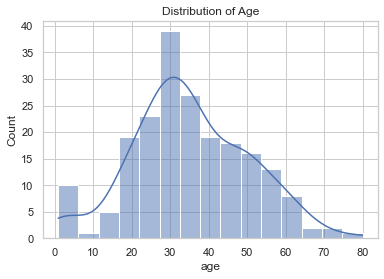

In [8]:
# Histogram of Age
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Distribution of Age")
plt.show()


 
### Insights:
 
1.Most passengers were children/young adults, peak around 20-30 years.
 


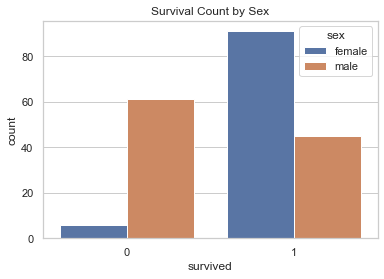

In [9]:
#Countplot of survived by sex
sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival Count by Sex")
plt.show()

 

 
#### Insights:
 
1.Females survived more than males.
 
2.Confirms the "women and children first" pattern.
 


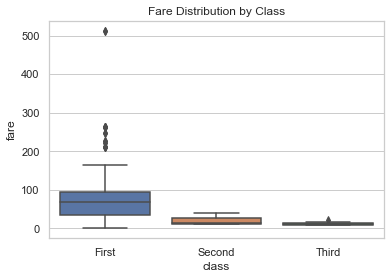

In [10]:

# Boxplot of Fare by Class
sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()
 



#### Insights:


1.1st class fares are more spread out, median higher.
 
2.3rd class has low fares with few outliers.
 

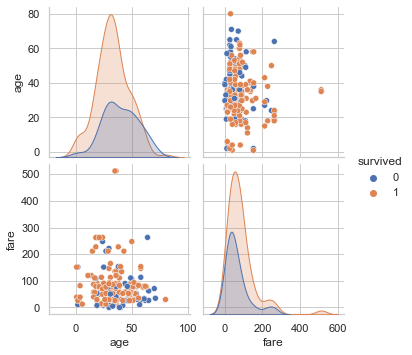

In [11]:

# Pairplot of numeric features with survival hue
sns.pairplot(df[['age','fare','survived']], hue='survived')
plt.show()
 


### Insights:
 
1.Shows relationships between age, fare, and survival.
 
2.Higher fare seems associated with higher survival.
 


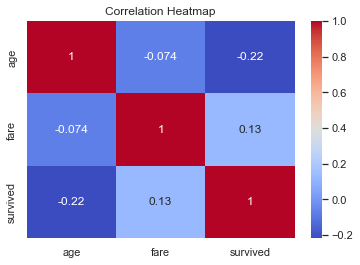

In [13]:

# Heatmap of correlation
corr = df[['age','fare','survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
 


### Insights:
 
1.Fare has positive correlation with survival (~0.26).
 
2.Age has slight negative correlation with survival (~-0.08).

# EDA (Exploratory Data Analysis)
1. Load datasets

2. Clean data (missing values, duplicates, types)

3. Treat outliers

4. Univariate, Bivariate and Multivariate analysis

5. Insights
## Outliers
A data point that is significantly different from other observations in a dataset.
### How outliers will come---?
1. Measurement errors

2. data entry mistakes

### Why they are important---?
1. They can be errors

2. They effect the data analysis
### How to identify the outliers---?
1. Statistical Methods 
    - Interquartile Range (IOR)
    - Z-score
2. Visualization Techniques
    - Box plots
    - Scatter plots
    - Histograms
## Univariate Analysis
A method that analyses a single variable to describe its characteristics, finding patterns and summarize the data .

- It involves only on variable
## Bivariate Analysis
It will give the relationship between two variables.It helps to find if there is any correlation, association or connection between two variables.

- It involves two variables (x & y).
## Multivariate Analysis
To understand how multiple factors interact & influence each other.

- It involves more than 2

Example - How our age, income, and education level together influence the purchasing behavior.
## ETL (Extract Transform Load)
### EDA : < Dataset >

1. Load & Overview

2. Cleaning (missing , dupes , dtypes)

3. Uni, Bi and Multi Analysis

4. Outliers - IQR

5. Feature Engineering

6. Key Insights
### Feature Engineering
"It is a process of turning raw data into useful features" - that helps to improve the performance of Machine Learning models.


In [ ]:

# convert some columns to category type
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()
# Missing values Analysis
missing = pd.DataFrame({
    'missing_count' : df.isnull().sum(),
    'missing_percent' : (df.isnull().sum()/len(df))*100
})

missing.sort_values(by='missing_percent', ascending=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     203 non-null    int64   
 1   pclass       203 non-null    int64   
 2   sex          203 non-null    category
 3   age          203 non-null    float64 
 4   sibsp        203 non-null    int64   
 5   parch        203 non-null    int64   
 6   fare         203 non-null    float64 
 7   embarked     203 non-null    category
 8   class        203 non-null    category
 9   who          203 non-null    object  
 10  adult_male   203 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  201 non-null    object  
 13  alive        203 non-null    object  
 14  alone        203 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(3)
memory usage: 17.8+ KB


,missing_count,missing_percent
embark_town,2,0.985222
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,0,0.000000
class,0,0.000000


# Univariate Analysis - Numerical Features

In [ ]:

num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()


,survived,pclass,age,sibsp,parch,fare
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.669951,1.197044,35.210361,0.443350,0.438424,76.341708
std,0.471393,0.527080,15.055524,0.629704,0.731133,74.520547
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,29.206250
50%,1.000000,1.000000,34.000000,0.000000,0.000000,55.441700
75%,1.000000,1.000000,47.000000,1.000000,1.000000,89.552100
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


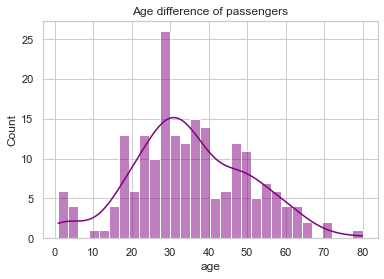

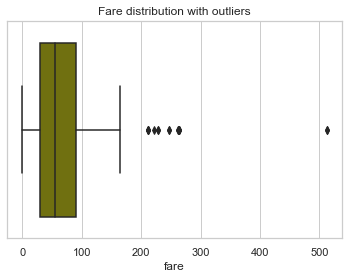

In [17]:

# Histogram : Age
sns.histplot(df['age'],bins=30,kde=True,color='purple')
plt.title("Age difference of passengers")
plt.show()

# Boxplot : Fare
sns.boxplot(x=df['fare'],color='olive')
plt.title("Fare distribution with outliers")
plt.show()

# Univariate Analysis - Categorical Features

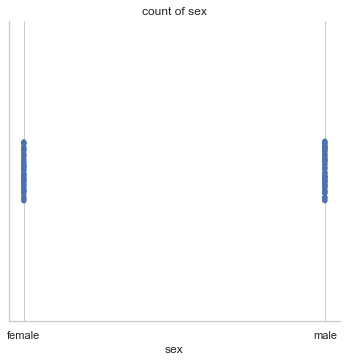

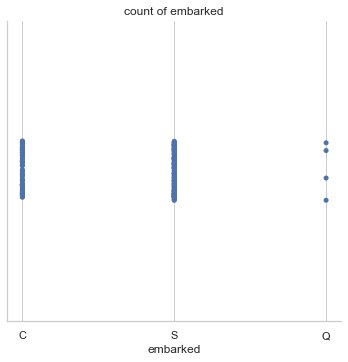

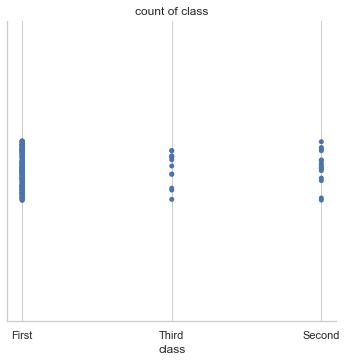

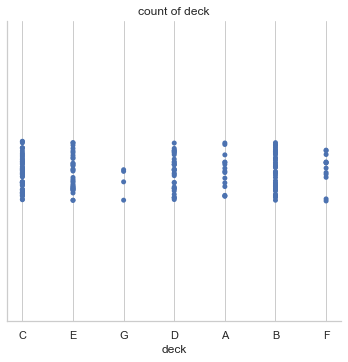

In [ ]:



cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"count of {col}")
    plt.show()

# Bivariate Analysis - Numerical v/s Categorical

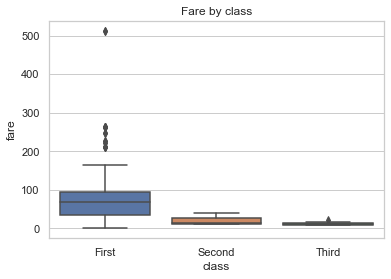

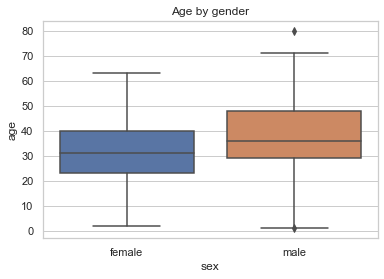

In [ ]:



sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("Age by gender")
plt.show()

# Bivariate Analysis - Categorical v/s Categorical

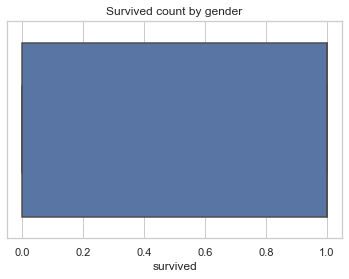

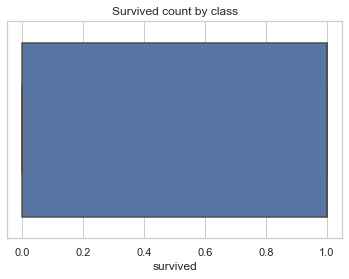

In [ ]:


sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Survived count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survived count by class")
plt.show()


# multivariate analysis

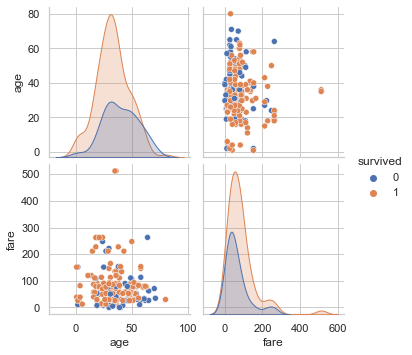

In [ ]:


sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()


### Insights
1. Fare has a positive correlation with survival

2. Age shows a slight negative correlation with survival

# Outlier detection using IQR

In [ ]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers in fare : ",len(outliers))


Number of outliers in fare :  17


# Outliers

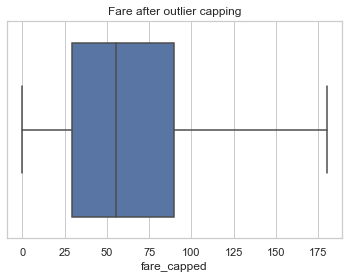

In [ ]:


df['fare_capped'] = df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()


# Feature Engineering

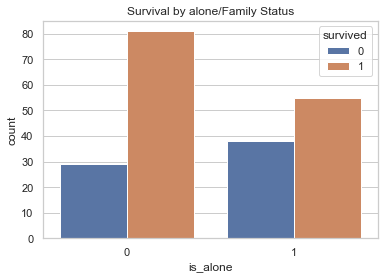

,family_size,is_alone,survived
1,2,0,1
3,2,0,1
6,1,1,0
10,3,0,1
11,1,1,1


In [ ]:


# create new features

df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("Survival by alone/Family Status")
plt.show()

df[['family_size','is_alone','survived']].head()


In [25]:
# Export th Cleaned data
df.to_csv("Titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as Titanic_cleaned.csv")


 Cleaned Titanic data saved as Titanic_cleaned.csv


# Statistics 

## Columns & Their Types

survived — Nominal (Binary) — No order (0 = No, 1 = Yes)

pclass — Ordinal — Has ranking (1st > 2nd > 3rd)

sex — Nominal — No order (male, female)

age — Continuous — Large range of values

sibsp — Discrete — Count of siblings/spouses (0,1,2…)

parch — Discrete — Count of parents/children (0,1,2…)

fare — Continuous — Large range of ticket prices

embarked — Nominal — No order (C, Q, S)

class — Ordinal — Order exists (First > Second > Third)

who — Nominal — No order (man, woman, child)

adult_male — Nominal (Binary) — Yes/No

deck — Ordinal — Alphabetical cabin levels (A higher than G)

embark_town — Nominal — No order (Southampton, Cherbourg, Queenstown)

alive — Nominal (Binary) — Yes/No

alone — Nominal (Binary) — Yes/No

fare_capped — Ordinal / Discrete — Fare categorized into ranges

family_size — Discrete — Count of family members

is_alone — Nominal (Binary) — Yes/No

In [27]:

df = pd.read_csv('titanic_cleaned.csv')

In [28]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_capped,family_size,is_alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.2833,2,0
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.1000,2,0
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,51.8625,1,1
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,16.7000,3,0
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,26.5500,1,1


<AxesSubplot:xlabel='fare_capped', ylabel='Count'>

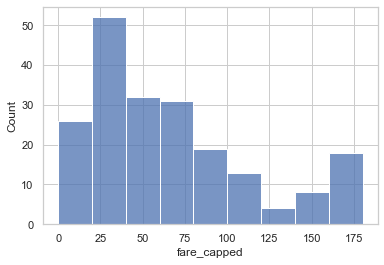

In [29]:
sns.histplot(df['fare_capped'])

In [30]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
fare_capped    0
family_size    0
is_alone       0
dtype: int64

In [31]:
mean = df['fare'].mean()
print(mean)
sd = df['fare'].std()
print(sd)

76.34170837438421
74.5205466067234


In [32]:
df['fare'].head(5)

0    71.2833
1    53.1000
2    51.8625
3    16.7000
4    26.5500
Name: fare, dtype: float64

In [33]:
# z-score for record --> >3 or <-3 treat as outliers

z1 = (71.2833 - mean)/sd
print(z1)
z2 = (53.1000 - mean)/sd
print(z2)
z3 = (51.8625 - mean)/sd
print(z3)
z4 = (16.7000 - mean)/sd
print(z4)
z5 = (26.5500 - mean)/sd
print(z5)

-0.06787937830192772
-0.3118832245963061
-0.3284893829828088
-0.8003391157225249
-0.6681608045249081


In [34]:
ma = df['fare'].max()
mi = df['fare'].min()
print("max : ",ma,"\nmin : ",mi,"\nrange : ",ma-mi)

max :  512.3292 
min :  0.0 
range :  512.3292


In [36]:
num_cols = ['age', 'fare', 'sibsp', 'parch', 'family_size']


for col in num_cols:
    sk = df[col].skew()
    ku = df[col].kurtosis()
    
    print(f"\nColumn: {col}")
    print("Skewness:", round(sk, 3))
    print("Kurtosis:", round(ku, 3))
    
    # Skewness Interpretation
    if sk > 1:
        print("→ Highly Positively Skewed → Not Acceptable")
    elif sk < -1:
        print("→ Highly Negatively Skewed → Not Acceptable")
    else:
        print("→ Moderately Skewed / Symmetric → Acceptable")
    
    # Kurtosis Interpretation
    if ku > 3:
        print("→ Leptokurtic Distribution → Not Acceptable")
    elif ku < 3:
        print("→ Platykurtic Distribution → Not Acceptable")
    else:
        print("→ Mesokurtic Distribution → Acceptable")



Column: age
Skewness: 0.123
Kurtosis: -0.03
→ Moderately Skewed / Symmetric → Acceptable
→ Platykurtic Distribution → Not Acceptable

Column: fare
Skewness: 2.737
Kurtosis: 11.049
→ Highly Positively Skewed → Not Acceptable
→ Leptokurtic Distribution → Not Acceptable

Column: sibsp
Skewness: 1.477
Kurtosis: 2.626
→ Highly Positively Skewed → Not Acceptable
→ Platykurtic Distribution → Not Acceptable

Column: parch
Skewness: 1.636
Kurtosis: 2.429
→ Highly Positively Skewed → Not Acceptable
→ Platykurtic Distribution → Not Acceptable

Column: family_size
Skewness: 1.582
Kurtosis: 2.957
→ Highly Positively Skewed → Not Acceptable
→ Platykurtic Distribution → Not Acceptable


In [37]:
df1 = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['sex'], axis=1)


In [38]:
df1 = pd.get_dummies(df['embarked'], prefix='emb', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['embarked'], axis=1)


In [39]:
df1 = pd.get_dummies(df['who'], prefix='who', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['who'], axis=1)


In [40]:
df1 = pd.get_dummies(df['adult_male'], prefix='adult', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['adult_male'], axis=1)


In [41]:
df1 = pd.get_dummies(df['deck'], prefix='deck', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['deck'], axis=1)


In [42]:
df1 = pd.get_dummies(df['embark_town'], prefix='town', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['embark_town'], axis=1)


In [43]:
df1 = pd.get_dummies(df['alive'], prefix='alive', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['alive'], axis=1)


In [44]:
df1 = pd.get_dummies(df['alone'], prefix='alone', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['alone'], axis=1)


In [45]:
df1 = pd.get_dummies(df['class'], prefix='class', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['class'], axis=1)


In [46]:
df1 = pd.get_dummies(df['pclass'], prefix='pclass', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['pclass'], axis=1)


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          203 non-null    int64  
 1   age               203 non-null    float64
 2   sibsp             203 non-null    int64  
 3   parch             203 non-null    int64  
 4   fare              203 non-null    float64
 5   fare_capped       203 non-null    float64
 6   family_size       203 non-null    int64  
 7   is_alone          203 non-null    int64  
 8   sex_male          203 non-null    uint8  
 9   emb_Q             203 non-null    uint8  
 10  emb_S             203 non-null    uint8  
 11  who_man           203 non-null    uint8  
 12  who_woman         203 non-null    uint8  
 13  adult_True        203 non-null    uint8  
 14  deck_B            203 non-null    uint8  
 15  deck_C            203 non-null    uint8  
 16  deck_D            203 non-null    uint8  
 1

In [49]:
df.head()


,survived,age,sibsp,parch,fare,fare_capped,family_size,is_alone,sex_male,emb_Q,...,deck_F,deck_G,town_Queenstown,town_Southampton,alive_yes,alone_True,class_Second,class_Third,pclass_2,pclass_3
0,1,38.0,1,0,71.2833,71.2833,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,35.0,1,0,53.1000,53.1000,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,54.0,0,0,51.8625,51.8625,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1,4.0,1,1,16.7000,16.7000,3,0,0,0,...,0,1,0,1,1,0,0,1,0,1
4,1,58.0,0,0,26.5500,26.5500,1,1,0,0,...,0,0,0,1,1,1,0,0,0,0


# Transformations

In [51]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer(method='yeo-johnson')
fare_trans = trans.fit_transform(df[['fare']])

print(fare_trans.shape)

print("Skewness :", pd.Series(fare_trans.flatten()).skew())
print("Kurtosis :", pd.Series(fare_trans.flatten()).kurtosis())

(203, 1)
Skewness : 0.04923524807266765
Kurtosis : 0.7234252013953308


In [52]:
trans = PowerTransformer(method='yeo-johnson')
fs_trans = trans.fit_transform(df[['family_size']])

print(fs_trans.shape)

print("Skewness :", pd.Series(fs_trans.flatten()).skew())
print("Kurtosis :", pd.Series(fs_trans.flatten()).kurtosis())


(203, 1)
Skewness : 0.2053524516695372
Kurtosis : -1.4634513619837162


In [53]:
trans = PowerTransformer(method='yeo-johnson')
sibsp_trans = trans.fit_transform(df[['sibsp']])

print(sibsp_trans.shape)

print("Skewness :", pd.Series(sibsp_trans.flatten()).skew())
print("Kurtosis :", pd.Series(sibsp_trans.flatten()).kurtosis())


(203, 1)
Skewness : 0.5034339700332313
Kurtosis : -1.7239179643030202


In [54]:
trans = PowerTransformer(method='yeo-johnson')
parch_trans = trans.fit_transform(df[['parch']])

print(parch_trans.shape)

print("Skewness :", pd.Series(parch_trans.flatten()).skew())
print("Kurtosis :", pd.Series(parch_trans.flatten()).kurtosis())


(203, 1)
Skewness : 0.8386324490424563
Kurtosis : -1.2907262849656103
